LOCK-IN MEASUREMENTS OF NON-LINEAR RESISTANCE

Set-up:
Wire LIA in series with Keithley forcing pins.  Run the resulting DC offset AC voltage across a resistor and your sample in series.  The resistance of the resistor must be much greater than the resistance you expect from the sample. Make sure that DAC1 is set to X% on the LIA.  Use autophase to ensure that Y% is about 0.  Connect DAC1 to multimeter.

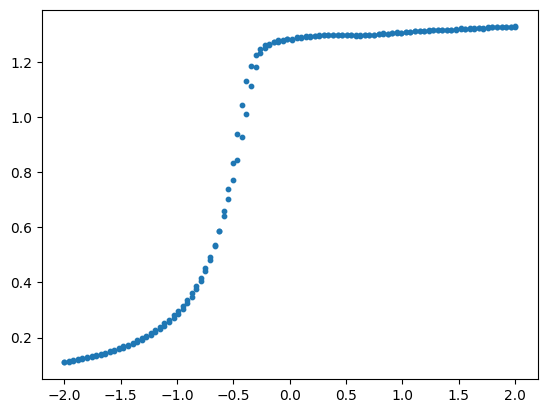

In [44]:
sensitivity = 0.01 # The sensitivity / full-scale voltage for the LIA
osc_amp = 0.025
resistor_box = 1e6
lower_bound = -2 # Lowest and 
upper_bound = 2  # highest DC offsets
num_samples = 100
max_current = 0.02 # highest current allowed by Keithley in Amps

import numpy as np
import pyvisa
import matplotlib.pyplot as plt

rm = pyvisa.ResourceManager()
keithley = rm.open_resource('GPIB::19::INSTR') # Enter Keithley's GPIB address
keithley.write(':FORM:DATA ASCII') # Data to be communicated in ASCII format
keithley.write(':SOUR:FUNC VOLT') # Set the Keithley to output voltage
keithley.write(':SENS:FUNC CURR:DC')
keithley.write(':SENS:CURR:PROT {}'.format(max_current)) # units automatically in Amps
keithley.write(':OUTP ON')

multimeter1 = rm.open_resource('GPIB::22::INSTR')
multimeter1.write(':CONF:VOLT:DC') # Set the multimeter to read volts DC
multimeter2 = rm.open_resource('GPIB::23::INSTR')
multimeter2.write(':CONF:VOLT:DC') # Set the multimeter to read volts DC

vin = np.linspace(lower_bound, upper_bound, num_samples)
vin = np.concatenate((vin, np.linspace(upper_bound, lower_bound, num_samples))) # the voltages cycle back to check for historeisis
vout = []
for v in vin:
    keithley.write(':SOUR:VOLT {}'.format(v))
    v1 = float(multimeter1.query(':MEAS:VOLT:DC?'))
    v2 = float(multimeter2.query(':MEAS:VOLT:DC?'))
    vout.append(np.sqrt(v1 ** 2 + v2 ** 2))

vout = np.float64(np.array(vout))

plt.scatter(vin, vout, s = 10) # This is raw data.  The X-axis is input DC offset; the Y-axis is the amplitude of the voltage oscillation across the sample

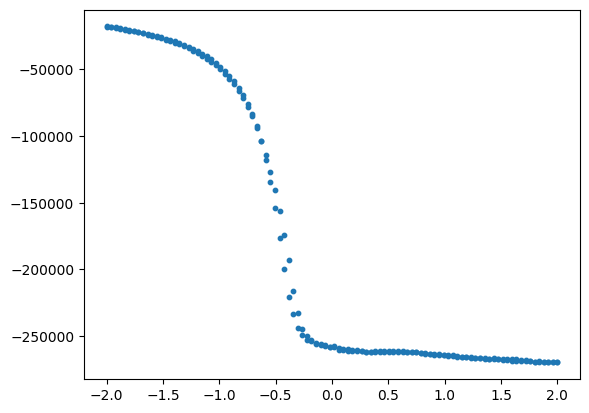

In [45]:
vout = vout * sensitivity / 2.5
rout = (resistor_box * vout) / (vout - osc_amp) # Scales read voltage to resistance (Note that for this calculation to work it is necessary for 
# resistor_box >> rout)
plt.scatter(vin, rout, s = 10)

In [46]:
np.savetxt('File_Name.txt', np.stack((vin, rout)), delimiter=',')